<h1>Trabajo Muestreo-Interferencia</h1>
<!----Hey hey!!!---->

<h2>Asignatura: Estadistica 2</h2>

<h3>Profesor: Carlos Alfonso Mantilla Duarte
<br>
Grupo: F1</h3>

<h4> Andrés Felipe Uribe García - 2160793
<br>Julian - 212121
<br>Isabel - 212121</h4>

En los siguientes enlaces encontrará los datos relacionados con los resultados de las pruebas de estado para las Instituciones de Educación Superior (IES) colombianas de carácter universitario de los últimos tres (3) años:

 https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData

Considere estos datos como una población finita. Las variables que componen la tabla son:



 - `periodo:` año de realización de la prueba. La variable se presenta fragmentada debido al origen de los datos. Requiere agruparse adecuadamente. Para ello, consulte la función revalue y describa, brevemente, su funcionamiento.
 -  `apli_consecutivo:` consecutivo asignado al estudiante en el momento de presentar la prueba. Único por estudiante
 -  `estu_depto_reside:` departamento de residencia del estudiante
 -   `estu_cod_reside_depto:` código DANE del departamento de residencia del estudiante
 -   `inst_cod_institucion:` código de la IES ante el ministerio. Único por Institución
 -   `inst_nombre_institucion:` Nombre de la Institución. Algunas presentan sedes y subsedes
 -   `raz_cuant_punt:` Puntaje Razonamiento Cuantitativo
 -   `raz_cuant_des:` Nivel de Desempeño Razonamiento Cuantitativo (categórica)
 -   `lect_crit_punt:` Puntaje Lectura Crítica
 -   `lect_crit_des:` Nivel de Desempeño Lectura Crítica (categórica)
 -   `comp_ciud_punt:` Puntaje Competencias Ciudadanas
 -   `comp_ciud_des:` Nivel de Desempeño Competencias Ciudadanas (categórica)
 -   `ingles_punt:` Puntaje Inglés
 -   `ingles_desem:` Nivel de Desempeño en Inglés (categórica)
 -  `comu_escr_punt:` Puntaje Comunicación Escrita
 -  `comu_escr_des:` Nivel de Desempeño Comunicación Escrita (categórica)

Tenga en cuenta que algunas variables categóricas figuran como numéricas, haga la correspondiente transformación.

Los puntos a desarrollar son:


   1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables
   2.  Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes
   3.  Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes
   4.  ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta
    Si la respuesta del punto 4 fue positiva, realice el correspondiente muestreo y compare con los anteriores
   5.  Para las estimaciones emplee los siguientes niveles de confianza: 90%, 95% y 99%.

El trabajo puede entregarse en formato PDF o como notebook de jupyter

Recomendaciones:

 -   Procure tabular de manera adecuada las estimaciones para optimizar espacio
 -   Evite extenderse en las explicaciones
 -   Trate de optimizar el uso de gráficas (visite el siguiente repositorio si desea una guía: https://github.com/karlosmantilla/graficas-basicas-descriptivas-
 -   Referencie las fórmulas empleadas en los cálculos


In [1]:
library(samplingbook) # llamamos la librería
load('saberpro.RData')
ls() 
dim(sp161718)

Loading required package: pps

Loading required package: sampling

Loading required package: survey

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: 'survival'


The following objects are masked from 'package:sampling':

    cluster, strata



Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart




[1] "sp161718"

[1] 725295     16

In [2]:
mystats <- function(x, na.omit=FALSE){
  if (na.omit)
  x <- x[!is.na(x)]
  m <- mean(x)
  n <- length(x)
  s <- sd(x)
  skew <- sum((x-m)^3/s^3)/n
  kurt <- sum((x-m)^4/s^4)/n - 3
  return(c("tamaño"=n, "media"=m, "desviación estándar"=s, "simetría"=skew, "kurtosis"=kurt))
}

In [3]:
Datos<-get(load("saberpro.RData"))

In [4]:
head(Datos); tail(Datos) # Primeras y últimas observaciones de la tabla

,periodo,apli_consecutivo,estu_depto_reside,estu_cod_reside_depto,inst_cod_institucion,inst_nombre_institucion,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des,ingles_punt,ingles_desem,comu_escr_punt,comu_escr_des
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>
1,20163,EK201630062726,ATLANTICO,8,1202,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,160,3,130,2,167,3,160,A2,155,3
2,20163,EK201630208121,CUNDINAMARCA,25,2725,POLITECNICO GRANCOLOMBIANO-BOGOTÃ D.C.,138,2,132,2,77,1,125,A1,164,3
3,20163,EK201630220210,CALDAS,17,2829,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÃ D.C.,146,2,157,2,150,2,104,A1-,122,2
4,20163,EK201630180243,MAGDALENA,47,10413,IED ESCUELA NORMAL SUPERIOR MARÃA AUXILIADORA - SEDE PRINCIPAL-SANTA MARTA,160,3,172,3,151,2,160,A2,192,4
5,20163,EK201630225077,CORDOBA,23,1113,UNIVERSIDAD DE CORDOBA-MONTERIA,130,2,122,1,144,2,192,B1,131,2
6,20163,EK201630189735,CAUCA,19,1807,UNIVERSIDAD LIBRE-CALI,159,3,129,2,147,2,108,A1-,154,3


,periodo,apli_consecutivo,estu_depto_reside,estu_cod_reside_depto,inst_cod_institucion,inst_nombre_institucion,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des,ingles_punt,ingles_desem,comu_escr_punt,comu_escr_des
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>
725290,20183,EK201830220242,VALLE,76,2114,ESCUELA NACIONAL DEL DEPORTE-CALI,125,1,111,1,100,1,134,A1,140,2
725291,20183,EK201830103468,SANTANDER,68,2847,"CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -""UDI""-BUCARAMANGA",182,3,145,2,152,2,167,A2,154,3
725292,20183,EK201830186897,BOGOTA,11,9104,"ESCUELA MILITAR DE CADETES ""GENERAL JOSE MARIA CORDOVA""-BOGOTÃƒÂ D.C.",149,2,129,2,110,1,168,A2,122,2
725293,20183,EK201830155382,SANTANDER,68,2207,INSTITUTO UNIVERSITARIO DE LA PAZ-BARRANCABERMEJA,185,3,173,3,190,3,148,A2,178,3
725294,20183,EK201830225312,,NA,1201,UNIVERSIDAD DE ANTIOQUIA-MEDELLIN,179,3,165,3,192,3,156,A2,150,3
725295,20183,EK201830039482,SUCRE,70,2823,CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-SINCELEJO,135,2,122,1,99,1,132,A1,138,2


<h2>Definición de los datos</h2>

In [5]:
#RELLENAMOS ESPACIOS
R<-data.frame(C=Datos$estu_cod_reside_depto,
                RC=Datos$raz_cuant_punt,
                LC=Datos$lect_crit_punt,
                CC=Datos$comp_ciud_punt,
                I=Datos$ingles_punt,
                CE=Datos$comu_escr_punt,
                P=Datos$periodo,
                D=Datos$estu_depto_reside)

sum(is.na(R$C))
#sum(is.na(P$RC))
#sum(is.na(P$LC))
#sum(is.na(P$CC))
#sum(is.na(P$I))
sum(is.na(R$CE))
#sum(is.na(P$P))
#sum(is.na(P$D))

datoslimpios = na.omit(R)

MCE = round(mean(datoslimpios$CE))
MC = round(mean(datoslimpios$C))
R$CE[is.na(R$CE)] = MCE
R$C[is.na(R$C)] = MC

sum(is.na(R$CE))
sum(is.na(R$C))


[1] 1997

[1] 22114

[1] 0

[1] 0

In [6]:
PT<-data.frame(C=R$C,
               T=(R$RC + R$LC + R$CC + R$I + R$CE)/5, # Global
                RC=R$RC,
                LC=R$LC,
                CC=R$CC,
                I=R$I,
                CE=R$CE,
                P=R$P,
                D=R$D)

In [7]:
pop<-round(mystats(PT[,'T']),1)
data.frame(pop)

,pop
,<dbl>
tamaño,725295.0
media,149.0
desviación estándar,23.0
simetría,0.3
kurtosis,-0.1


<h3>Tamaño adecuado de la muestra</h3>

In [8]:
#c("tamaño"=n, "media"=m, "desviación estándar"=s, "simetría"=skew, "kurtosis"=kurt)
#error del 5%
e=0.05*pop['media'] #Error * Media
s=pop['desviación estándar'] #Desviación Estandar
sample.size.mean(e,s, level = 0.90)
e=0.03*pop['media'] #Error * Media
s=pop['desviación estándar'] #Desviación Estandar
sample.size.mean(e,s, level = 0.95)
e=0.01*pop['media'] #Error * Media
sample.size.mean(e,s, level = 0.99)


sample.size.mean object: Sample size for mean estimate
Without finite population correction: N=Inf, precision e=7.45 and standard deviation S=23

Sample size needed: 26



sample.size.mean object: Sample size for mean estimate
Without finite population correction: N=Inf, precision e=4.47 and standard deviation S=23

Sample size needed: 102



sample.size.mean object: Sample size for mean estimate
Without finite population correction: N=Inf, precision e=1.49 and standard deviation S=23

Sample size needed: 1581


In [9]:
n1<-26
Rf1<- sample(1:nrow(PT),size=n1,replace=FALSE)
n2<-102
Rf2<- sample(1:nrow(PT),size=n2,replace=FALSE)
n3<-1581
Rf3<- sample(1:nrow(PT),size=n3,replace=FALSE)

<h1>1- Muestreo Simple</h1>
<H4>Total vs Razonamiento cuantitativo - Inglés - Lectura Crítica</H4>

<h3>Primer Muestreo N = 26</h3>
Nivel de confianza del $90\%$
Error del $5\%$

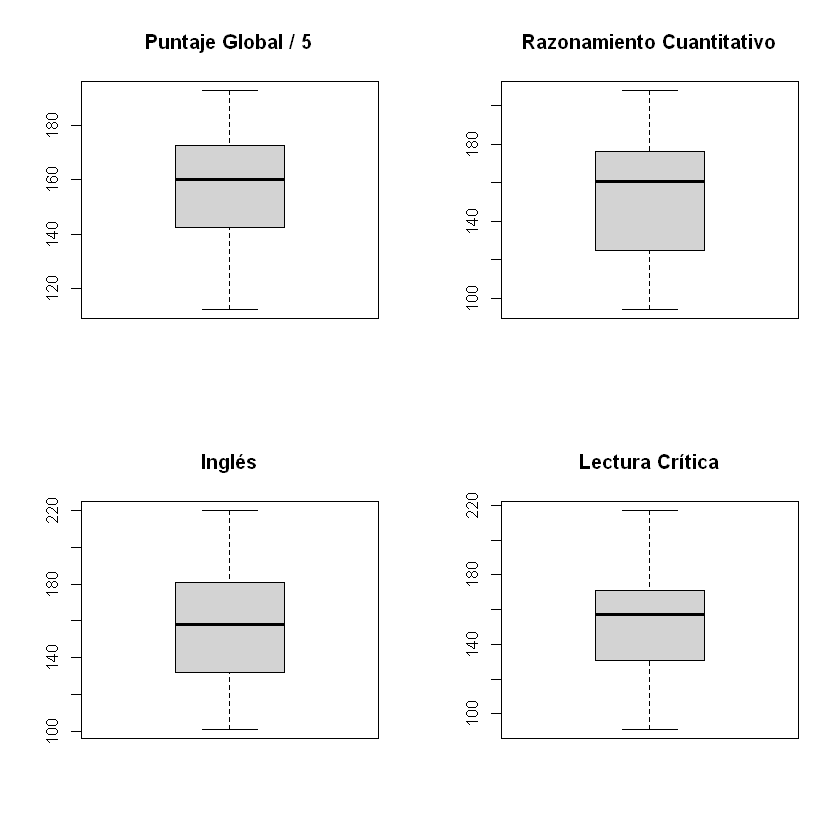

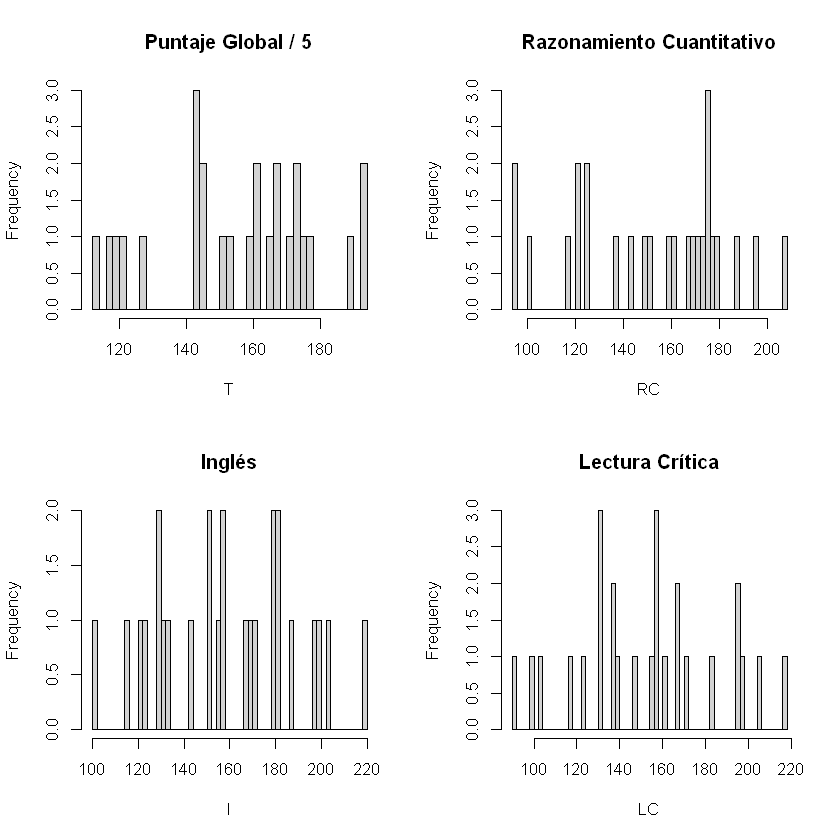

In [10]:
par(mfrow=c(2,2))

with(PT[Rf1,], boxplot(T, main = 'Puntaje Global / 5'))
with(PT[Rf1,], boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT[Rf1,], boxplot(I, main = 'Inglés'))
with(PT[Rf1,], boxplot(LC, main = 'Lectura Crítica'))

with(PT[Rf1,], hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(PT[Rf1,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[Rf1,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[Rf1,], hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

<h3>Segundo Muestreo N = 102</h3>
Nivel de confianza del $95\%$
Error del $3\%$

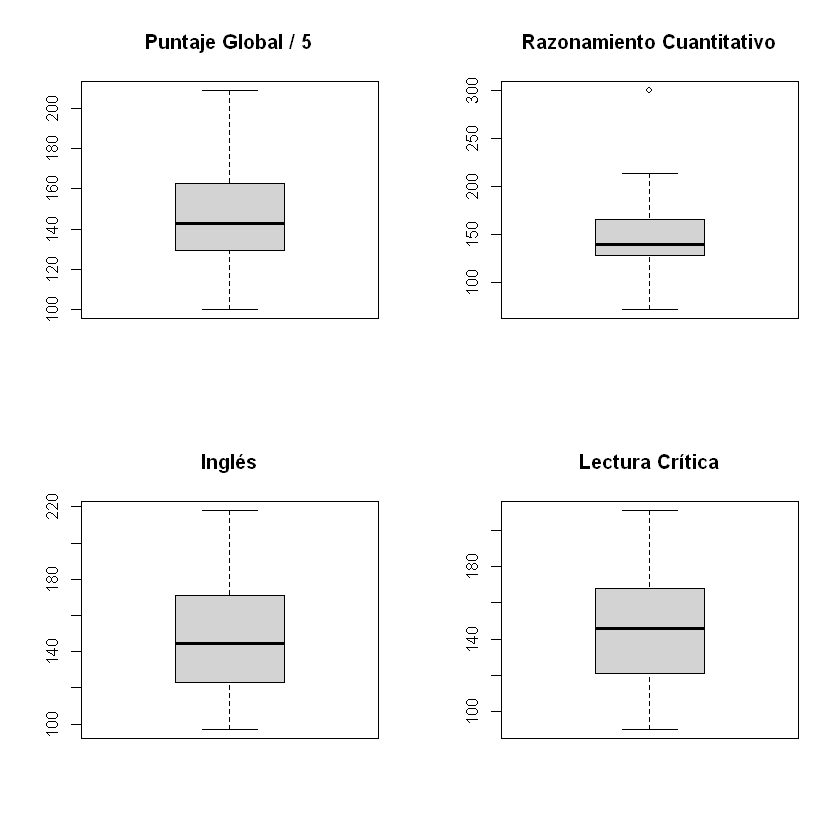

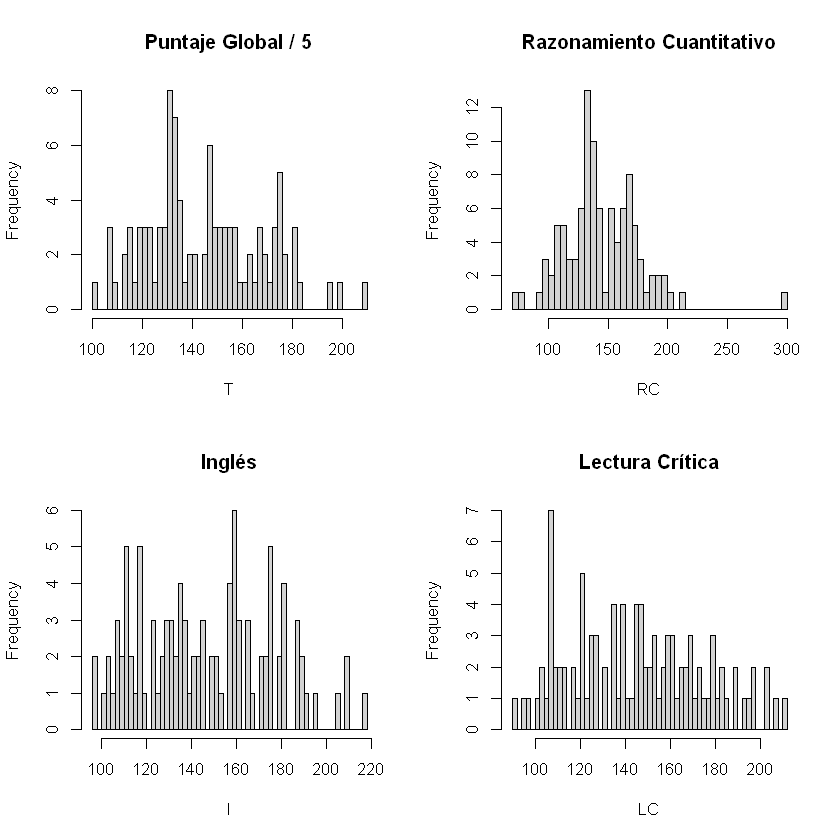

In [11]:
par(mfrow=c(2,2))
with(PT[Rf2,], boxplot(T, main = 'Puntaje Global / 5'))
with(PT[Rf2,], boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT[Rf2,], boxplot(I, main = 'Inglés'))
with(PT[Rf2,], boxplot(LC, main = 'Lectura Crítica'))
with(PT[Rf2,], hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(PT[Rf2,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[Rf2,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[Rf2,], hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

<h3>Tercer Muestreo N = 1581</h3>
Nivel de confianza del $99\%$
Error del $1\%$

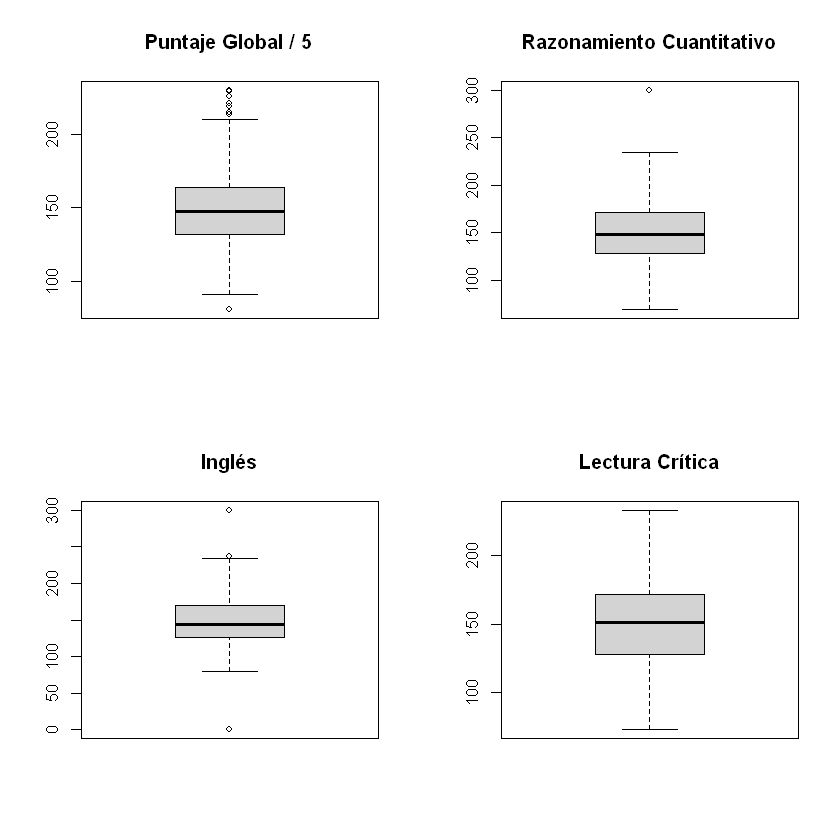

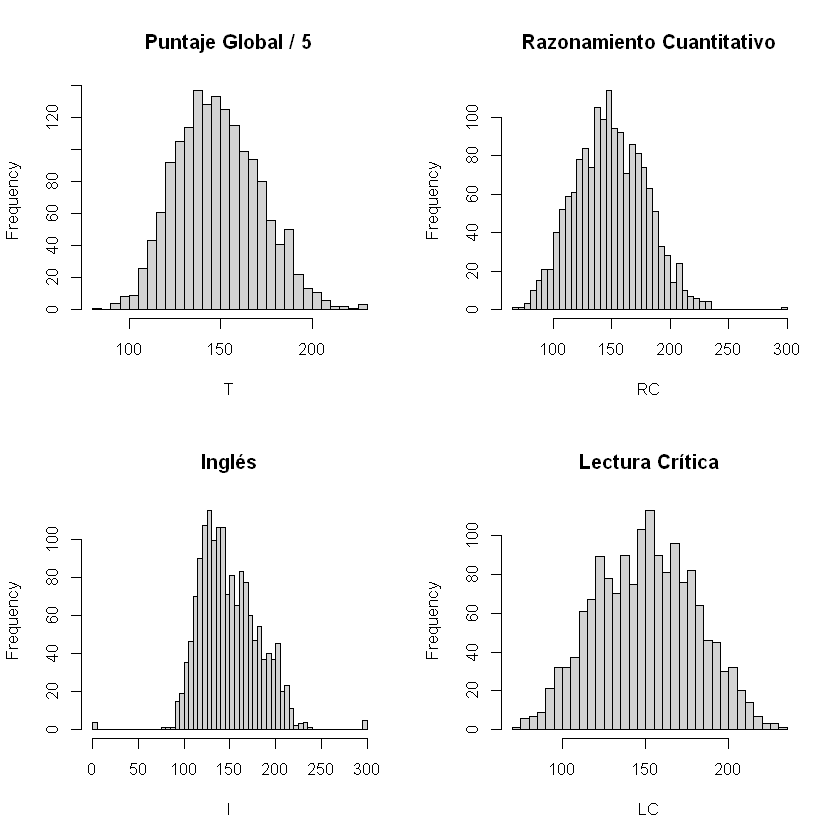

In [12]:
par(mfrow=c(2,2))
with(PT[Rf3,], boxplot(T, main = 'Puntaje Global / 5'))
with(PT[Rf3,], boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT[Rf3,], boxplot(I, main = 'Inglés'))
with(PT[Rf3,], boxplot(LC, main = 'Lectura Crítica'))
with(PT[Rf3,], hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(PT[Rf3,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[Rf3,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[Rf3,], hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

### Inferencia

Para este caso comparamos 3 variables; Razonamiento cuantitativo, inglés, Lectura Crítica contra a una cuarta creada para entrar en contexto la cual es "Puntaje Global" definida como la suma de todas las variables cuantitativas divididas por 5

Las gráficas las creamos tomando 3 tamaños de muestra distintos el primero N1 = 26, N2=102 y N3 = 1581, variando los niveles de confianza en 90%, 95% y 99% y el error en 5%, 3% y 1%.

Podemos apreciar que el primer y segundo muestreo, resultaban deficientes al no permitir apreciar con un nivel de detalle adecuado el comportamiento de los datos, mientras que el valor N3 no dista de los resultados obtenidos de la población total a un menor costo computacional.

De los resultados obtenidos podemos apreciar que la asignatura inglesa representa un mayor reto para la mayoría de los estudiantes teniendo un pico mucho pronunciado hacia los 120 pts. decayendo con una pendiente mayor hacia los puntajes más altos a diferencia de Razonamiento Cuantitativo y Lectura crítica que pueden ser fácilmente modeladas por una distribución normal


<h1>2- Muestreo Estratificado</h1>

In [13]:
library(dplyr)
library(magrittr) # las librerias 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




<H4>Las variables a usar para la estratificacion periodo,ingles_punt</H4>

In [14]:
head(PT)

,C,T,RC,LC,CC,I,CE,P,D
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>
1,8,154.4,160,130,167,160,155,20163,ATLANTICO
2,25,127.2,138,132,77,125,164,20163,CUNDINAMARCA
3,17,135.8,146,157,150,104,122,20163,CALDAS
4,47,167.0,160,172,151,160,192,20163,MAGDALENA
5,23,143.8,130,122,144,192,131,20163,CORDOBA
6,19,139.4,159,129,147,108,154,20163,CAUCA


In [15]:
Estratificacion<- PT %>%
                  select(P,T)%>%
                  group_by(P) %>%
                  summarise(n=n(),
                            s=sd(T)) %>%
                  mutate(p=n/sum(n))

Estratificacion

`summarise()` ungrouping output (override with `.groups` argument)



P,n,s,p
<int>,<int>,<dbl>,<dbl>
20162,1308,18.34751,0.0018034041
20163,241320,22.54866,0.3327197899
20172,1408,21.45691,0.0019412791
20173,244158,23.28049,0.3366326805
20182,1527,22.86895,0.0021053502
20183,235201,22.95642,0.3242832227
20184,373,21.43232,0.0005142735


In [16]:
library('SamplingUtil') #esta libreria permite calcular los estratos

ahora hallaremos las proporciones que se usaran en la muestra más optima entrada en el punto anterior

In [17]:
nsizeProp1581<-nstrata(n=1581,wh=Estratificacion[,4],method="proportional")

In [18]:
data.frame(periodo=Estratificacion$P,nsizeProp1581)

periodo,p
<int>,<dbl>
20162,3
20163,527
20172,4
20173,533
20182,4
20183,513
20184,1


tenemos las proporciones y con ellas vamos a relizar las respectivas muestras simples 

In [19]:
#Muestras 1581
m621581<-sample(1:nrow(PT[Estratificacion$P=='20162']),3,replace=FALSE)
m631581<- sample(1:nrow(PT[Estratificacion$P=='20163']),527,replace=FALSE)
m721581<- sample(1:nrow(PT[Estratificacion$P=='20172',]),4,replace=FALSE)
m731581<- sample(1:nrow(PT[Estratificacion$P=='20173',]),533,replace=FALSE)
m821581<- sample(1:nrow(PT[Estratificacion$P=='20182',]),4,replace=FALSE)
m831581<- sample(1:nrow(PT[Estratificacion$P=='20182',]),513,replace=FALSE)
m841581<- sample(1:nrow(PT[Estratificacion$P=='20182',]),4,replace=FALSE)

ya tenemos todas nuestras muestras, ahora haremos un vector que las contenga


In [20]:
ME1581<-c(m621581,m631581,m721581,m731581,m821581,m831581,m841581)

In [21]:
tail(ME1581)
head(PT[ME1581,])

[1] 93200 83533 73069 76969 99140 28527

,C,T,RC,LC,CC,I,CE,P,D
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>
580639,68,129.6,123,154,138,117,116,20183,SANTANDER
407228,5,138.4,154,138,123,165,112,20173,ANTIOQUIA
704280,25,190.8,189,165,223,204,173,20183,CUNDINAMARCA
198210,23,123.6,126,147,116,104,125,20163,CORDOBA
516966,20,140.2,146,143,144,139,129,20183,CESAR
328810,5,152.6,148,137,148,160,170,20173,ANTIOQUIA


[1] "Muestreo Estratificado N=1581"


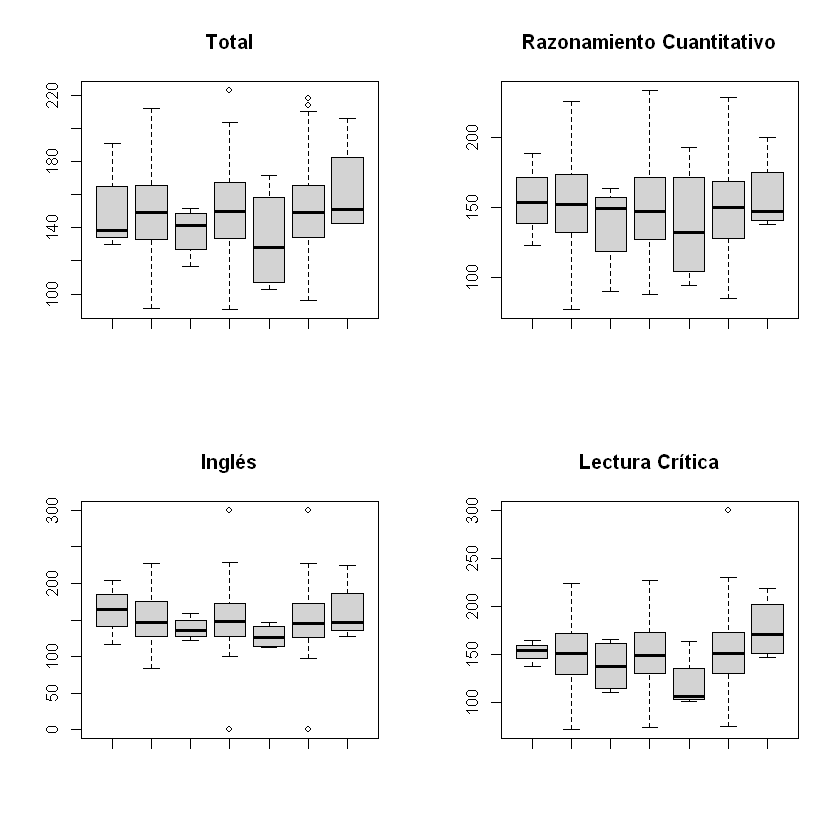

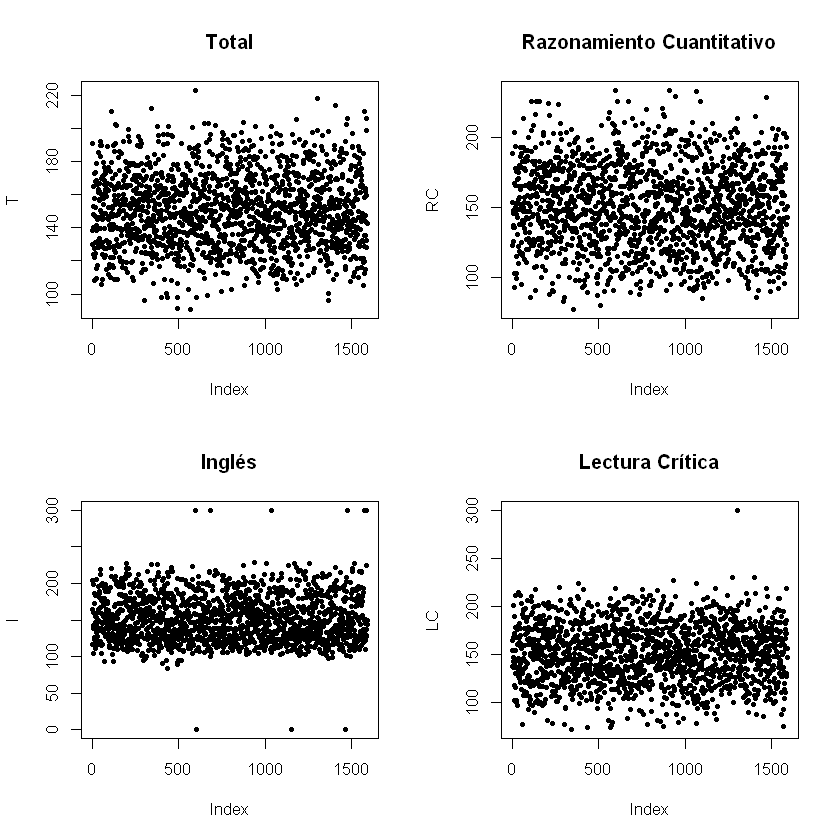

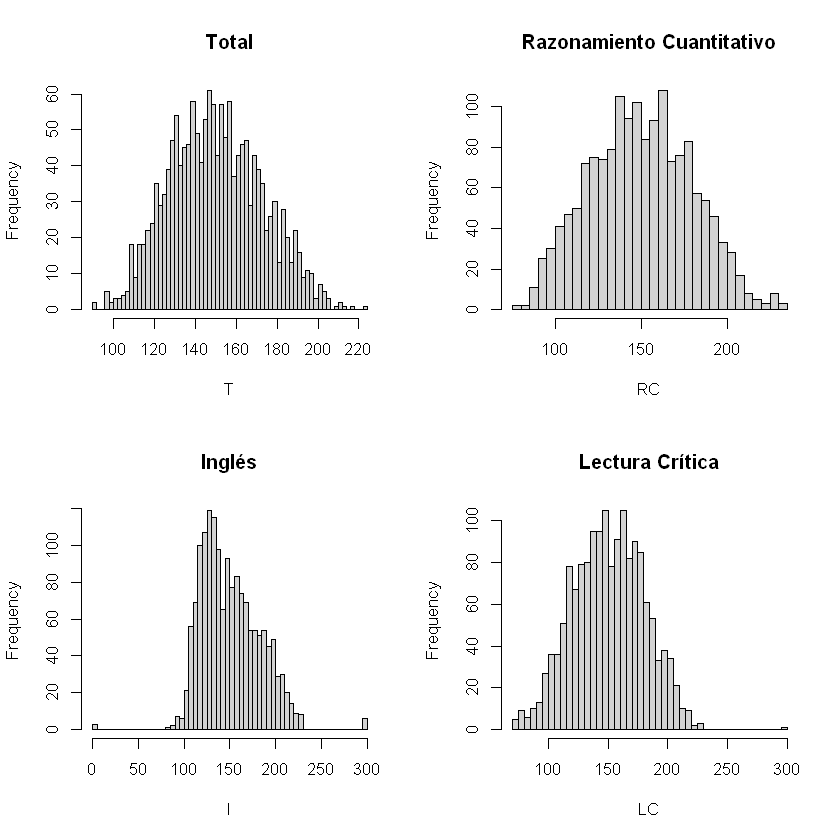

In [22]:
par(mfrow=c(2,2))
print('Muestreo Estratificado N=1581')
with(PT[ME1581,], boxplot(PT[m621581,]$T,
                          PT[m631581,]$T,
                          PT[m721581,]$T,
                          PT[m731581,]$T,
                          PT[m821581,]$T,
                          PT[m831581,]$T,
                          PT[m841581,]$T,
                          main = 'Total'))
with(PT[ME1581,], boxplot(PT[m621581,]$RC,
                          PT[m631581,]$RC,
                          PT[m721581,]$RC,
                          PT[m731581,]$RC,
                          PT[m821581,]$RC,
                          PT[m831581,]$RC,
                          PT[m841581,]$RC,
                          main = 'Razonamiento Cuantitativo'))
with(PT[ME1581,], boxplot(PT[m621581,]$I,
                          PT[m631581,]$I,
                          PT[m721581,]$I,
                          PT[m731581,]$I,
                          PT[m821581,]$I,
                          PT[m831581,]$I,
                          PT[m841581,]$I,
                          main = 'Inglés'))
with(PT[ME1581,], boxplot(PT[m621581,]$LC,
                          PT[m631581,]$LC,
                          PT[m721581,]$LC,
                          PT[m731581,]$LC,
                          PT[m821581,]$LC,
                          PT[m831581,]$LC,
                          PT[m841581,]$LC,
                          main = 'Lectura Crítica'))

with(PT[ME1581,], plot(T, pch = 20, main = 'Total'))
with(PT[ME1581,], plot(RC, pch = 20, main = 'Razonamiento Cuantitativo'))
with(PT[ME1581,], plot(I, pch = 20, main = 'Inglés'))
with(PT[ME1581,], plot(LC, pch = 20, main = 'Lectura Crítica'))

with(PT[ME1581,], hist(T, nclass = 50, main = 'Total'))
with(PT[ME1581,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[ME1581,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[ME1581,], hist(LC, nclass = 50, main = 'Lectura Crítica'))

par(mfrow=c(1,1))


### Inferencia

algo

<h1>3- Muestreo Conglomerado</h1>

In [23]:
PT$D=recode(PT$D,'NARIÃ‘O'= "NARIÑO")
PT$D=recode(PT$D,'NARIÃƒâ\200\230O'= "NARIÑO")
unique(PT[,9])

[1] ATLANTICO       CUNDINAMARCA    CALDAS          MAGDALENA      
 [5] CORDOBA         CAUCA           BOGOTA          ANTIOQUIA      
 [9] META            CESAR           VALLE           TOLIMA         
[13] BOYACA          SANTANDER       BOLIVAR                        
[17] HUILA           NORTE SANTANDER SUCRE           QUINDIO        
[21] VAUPES          RISARALDA       NARIÑO          CAQUETA        
[25] CASANARE        CHOCO           PUTUMAYO        LA GUAJIRA     
[29] GUAVIARE        ARAUCA          SAN ANDRES      VICHADA        
[33] AMAZONAS        EXTRANJERO      GUAINIA        
35 Levels:  AMAZONAS ANTIOQUIA ARAUCA ATLANTICO BOGOTA BOLIVAR ... VICHADA

In [24]:
Conglomerados<- PT %>%
  select(D,T) %>%
  group_by(D) %>%
  summarise(n=n(),
            std1=sd(T)) %>%
  mutate(p=n/sum(n))
  

head(Conglomerados[order(Conglomerados$p, decreasing = TRUE), ],6)

`summarise()` ungrouping output (override with `.groups` argument)



D,n,std1,p
<fct>,<int>,<dbl>,<dbl>
BOGOTA,210798,23.11200,0.29063760
ANTIOQUIA,86465,23.24833,0.11921356
VALLE,55996,22.86685,0.07720445
ATLANTICO,41127,23.03347,0.05670382
CUNDINAMARCA,39227,21.27240,0.05408420
SANTANDER,36348,22.17065,0.05011478


In [25]:
nsCProp100<-nstrata(n=2433,wh=Conglomerados[,4],method="proportional")
PC = data.frame(Departamento=Conglomerados$D,nsCProp100)
head(PC[order(PC$p, decreasing = TRUE),],6)

,Departamento,p
,<fct>,<dbl>
6,BOGOTA,708
3,ANTIOQUIA,291
33,VALLE,188
5,ATLANTICO,138
16,CUNDINAMARCA,132
30,SANTANDER,122


In [26]:
#la muestra real es de 1028 al reducice la cantidad de departamentos a los más relevantes
mBOGOTA<- sample(1:nrow(PT[Conglomerados$D=="BOGOTA",]),708)
mANTIOQUIA<- sample(1:nrow(PT[Conglomerados$D=="ANTIOQUIA",]),291)
mVALLE<- sample(1:nrow(PT[Conglomerados$D=="VALLE",]),188)
mATLANTICO<- sample(1:nrow(PT[Conglomerados$D=="ATLANTICO",]),138)
mCUNDINAMARCA<- sample(1:nrow(PT[Conglomerados$D=="CUNDINAMARCA",]),132)
mSANTANDER<- sample(1:nrow(PT[Conglomerados$D=="SANTANDER",]),124)

mCong100<-c(mBOGOTA,mANTIOQUIA,mVALLE,mATLANTICO,mCUNDINAMARCA,
            mSANTANDER)
head(PT[mCong100,],)


,C,T,RC,LC,CC,I,CE,P,D
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>
6233,11,135.4,136,142,136,132,131,20163,BOGOTA
14924,52,139.4,144,129,140,150,134,20163,NARIÑO
12268,11,148.2,163,136,149,138,155,20163,BOGOTA
20102,11,124.6,112,145,115,123,128,20163,BOGOTA
12235,47,145.4,134,160,147,122,164,20163,MAGDALENA
19699,52,120.6,124,113,126,115,125,20163,NARIÑO


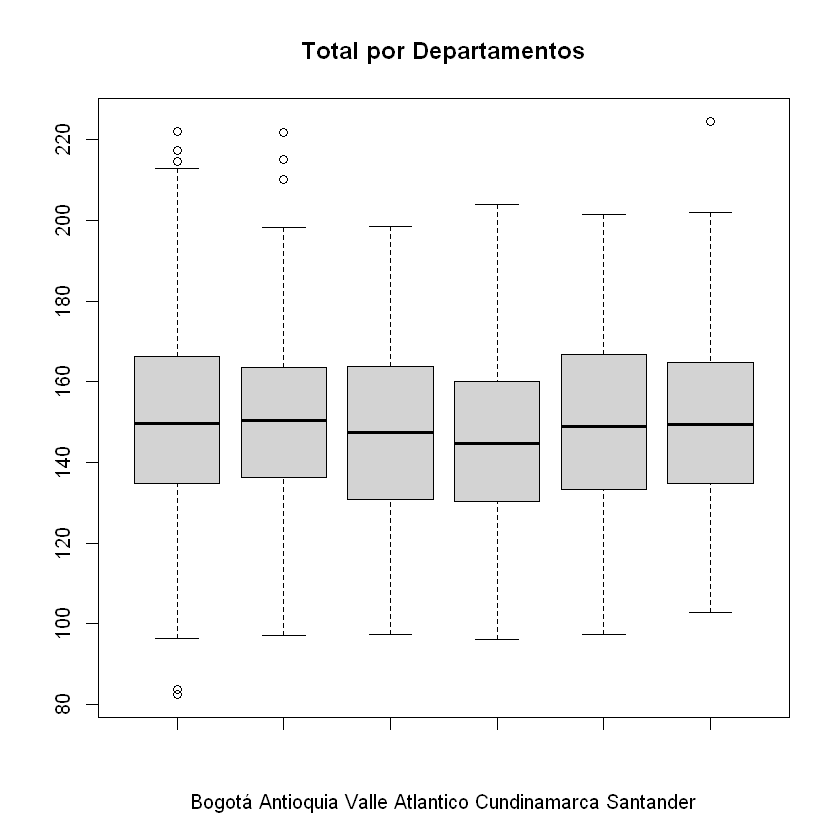

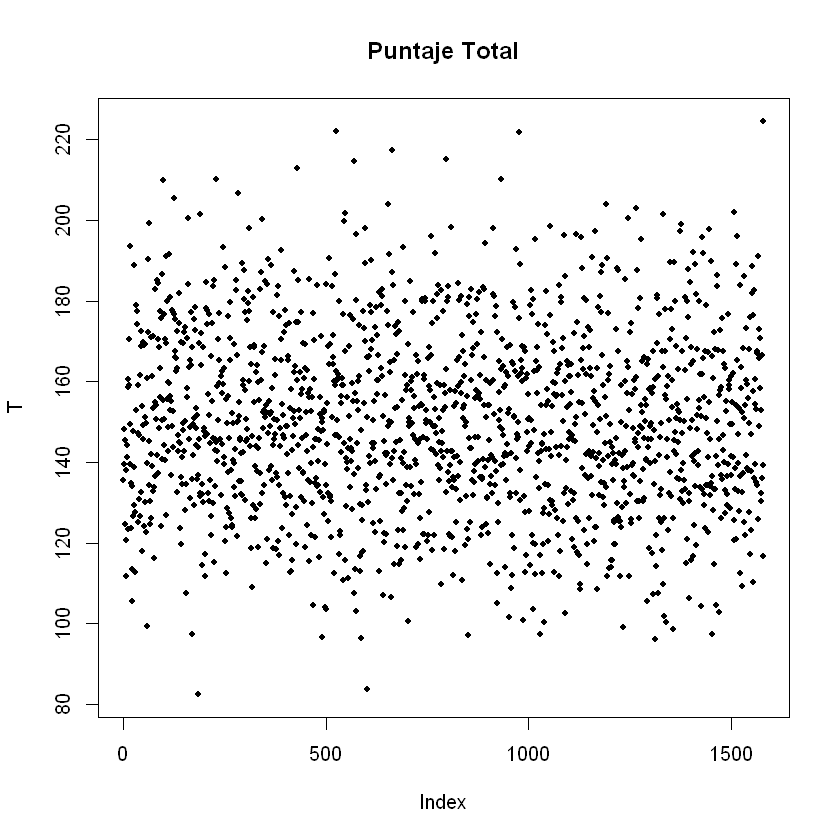

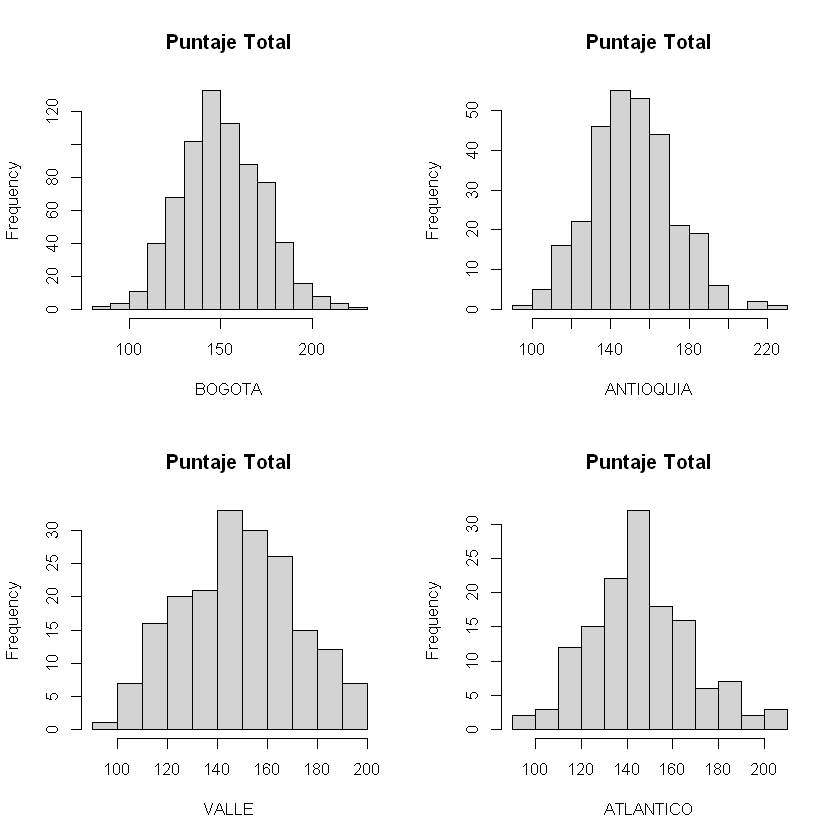

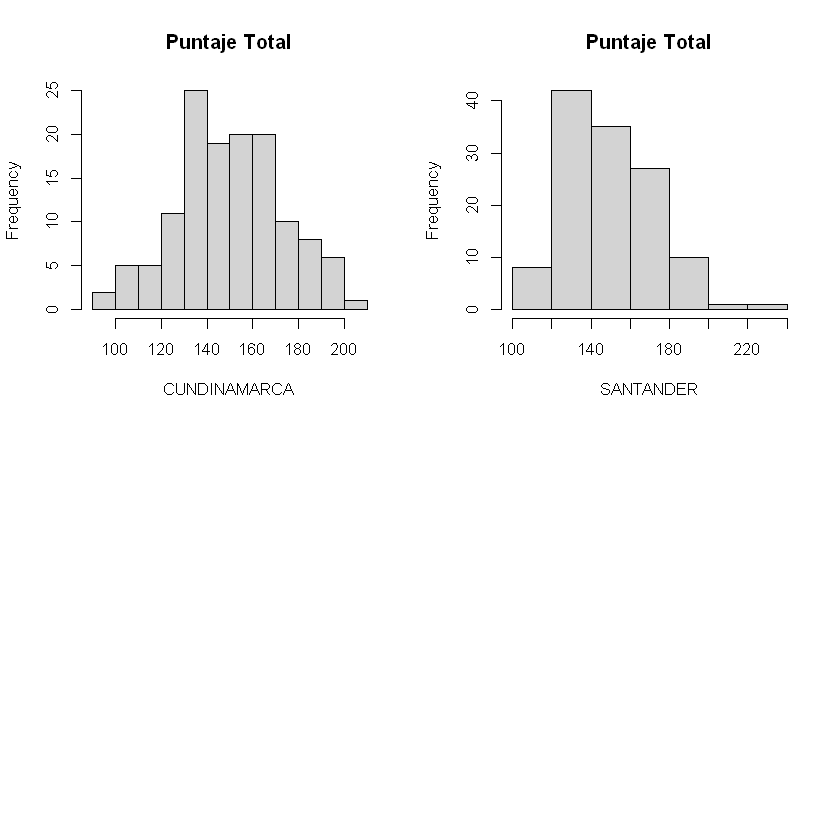

In [27]:
par(mfrow=c(1,1))
with(PT[mCong100,], boxplot(PT[mBOGOTA,]$T,
                          PT[mANTIOQUIA,]$T,
                          PT[mVALLE,]$T,
                          PT[mATLANTICO,]$T,
                          PT[mCUNDINAMARCA,]$T,
                          PT[mSANTANDER,]$T,
                          main = 'Total por Departamentos',
                          xlab='Bogotá Antioquia Valle Atlantico Cundinamarca Santander'))

with(PT[mCong100,], plot(T, pch = 20, main = 'Puntaje Total'))

par(mfrow=c(2,2))
with(PT[mCong100,], hist(PT[mBOGOTA,]$T, main = 'Puntaje Total',xlab="BOGOTA"))
with(PT[mCong100,], hist(PT[mANTIOQUIA,]$T, main = 'Puntaje Total',xlab="ANTIOQUIA"))
with(PT[mCong100,], hist(PT[mVALLE,]$T, main = 'Puntaje Total',xlab="VALLE"))
with(PT[mCong100,], hist(PT[mATLANTICO,]$T, main = 'Puntaje Total',xlab="ATLANTICO"))
with(PT[mCong100,], hist(PT[mCUNDINAMARCA,]$T, main = 'Puntaje Total',xlab="CUNDINAMARCA"))
with(PT[mCong100,], hist(PT[mSANTANDER,]$T, main = 'Puntaje Total',xlab="SANTANDER"))

### Inferencia

algo